## Steps in Machine Learning Project

#### 1. Look at the Big Picture
#### 2. Get the data
#### 3. Discover and Visualize the Data
#### 4. Prepare the data for ML Algorithm
#### 5. Select the model and train it
#### 6. Fine tune your model
#### 7. Present the solution
#### 8. Launch, Monitor and Maintain your system


# Step 1. Look at the Big Picture

### 1.1 Frame the problem
      a. What are input and output?
 
      b. What is the business objective?

      c. What is the current solution? May provide useful baseline. One way could be to use Human Labour to predict the label
      
  #### Design Consideration
  
  a. Supervised or Unsupervised?
  
  b. Single or Multiple outputs?
  
  c. Contnuous learning or periodic learning?
  
  d. Batch or Online learning?

### 1.2 Select the Performance Measure

a. Regression: MSE or MAE

b. classification: Precision, recall, F1-score, Accuracy

### 1.3 List and check the assumptions

Through discussion with team or product managers etc.

# Step 2: Get the Data

In [1]:
## Load the basic python libraries needed:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
### Get the data

data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(data_url, sep = ';')

In [3]:
## looking at first few data samples:

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
## Features:

feature_list = data.columns[:-1]
label = [data.columns[-1]]

In [5]:
print(feature_list)

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')


In [6]:
print(label)

['quality']


In [7]:
data.shape

(1599, 12)

## Data Statistics

In [8]:
## get quick description of data

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [9]:
## Nature of Numeric attributes:

data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [10]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Text(0, 0.5, 'Count')

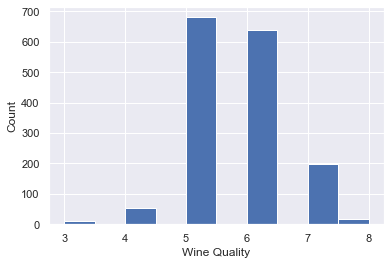

In [11]:
## Plotting the quality

sns.set()
data.quality.hist()
plt.xlabel('Wine Quality')
plt.ylabel('Count')

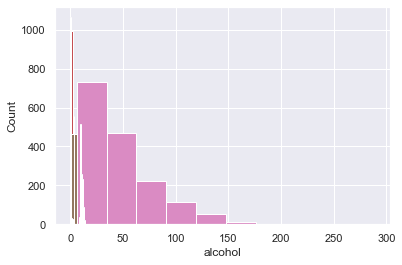

In [12]:
for featr in feature_list:
    # print(featr)
    sns.set()
    data[featr].hist()
    plt.xlabel(featr)
    plt.ylabel('Count')

Text(0, 0.5, 'Count')

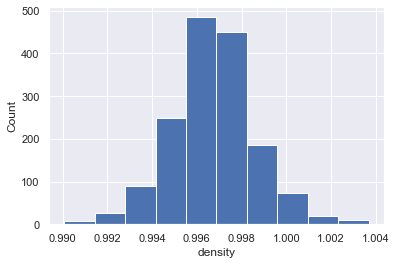

In [13]:
## Plotting the density:

sns.set()
data.density.hist()
plt.xlabel('density')
plt.ylabel('Count')

##### Different features have different scales and also different distributions

## Create a train test split

    Biased estimation on the test set if we dont split the data: **Data Snooping Bias**

In [14]:
## write a function to split the data into train and split dataset:


def split_train_test(data, test_ratio):
    # set random seed:
    np.random.seed(50)
    
    # shuffle the dataset:
    shuffled_indices = np.random.permutation(len(data))
    
    # calculate the size of the test set.
    test_set_size = int(len(data) * test_ratio)
    
    # split the dataset to get training and test set:
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return data.iloc[train_indices] , data.iloc[test_indices]

In [15]:
train_set, test_set = split_train_test(data, 0.2)

## Scikit learn function for test sets:

### 1. Random Sampling- randomly selects k% of 

### 2. Stratified Sampling- samples test examples such that they are representative of overall distribution

In [16]:
## Random sampling

'''
random_state: sets the random seed
test_size: specify the test size
shuffle_flag: if data needs to be shuffled

Multiple datasets can also be shuffled
'''

from sklearn.model_selection import train_test_split

train_set , test_set = train_test_split(data, test_size = 0.2, random_state = 50)

### Data distribution may not be uniform in real world data. Random sampling by its nature introduce bias in such data

 In such case divide the population into strata. 
 
 data is sampled from each stratum so as to match the overall data distribution.
 
 Scikit learn provides a class StratifiedShuffleSplit that helps us in stratified sampling. 

In [17]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(data, data["quality"]):
    strat_train_set = data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [18]:
strat_dist = strat_test_set["quality"].value_counts() / len(strat_test_set)

In [19]:
overall_dist = data["quality"].value_counts() / len(data)

In [20]:
strat_dist

5    0.425000
6    0.400000
7    0.125000
4    0.034375
8    0.009375
3    0.006250
Name: quality, dtype: float64

In [21]:
overall_dist

5    0.425891
6    0.398999
7    0.124453
4    0.033146
8    0.011257
3    0.006254
Name: quality, dtype: float64

In [22]:
## There is small difference in strata compared to overall distribution

# Stratified sampling gives test distribution closer to the overall distribution than random sampling

# Step4:  Data Preperation for ML algorithm

Typical Steps involved:
    
    1. Seperating features and labels
    2. Handling missing values and NaN values
    3. Feature scaling to bring all features to same scale
    4. Applying certain trasformations on features
    
    
 Good Practice to make a copy of data and then preprocess it

In [23]:
## Copy all the features except the label column
wine_features = strat_train_set.drop("quality", axis = 1)

## Copy the label list:
wine_labels = strat_train_set['quality'].copy()

In [24]:
# Check for missing values:

wine_features.isna().sum() # counts NaN values

# use imputation technique to handle the missing values | drop the columns that contain the missing values | If does not exist better to keep them NaN

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64

In [25]:
## SKlearn provide following methods to drop rows that contain the missing values
'''
dropna()
drop()
'''


'\ndropna()\ndrop()\n'

In [26]:
## SKlearn provides SimpleImputer class for filling up the missing values

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")

In [27]:
imputer.fit(wine_features) # calculates the median values

SimpleImputer(strategy='median')

In [28]:
## Median values for each features as learned by our imputer

imputer.statistics_

array([ 7.9    ,  0.52   ,  0.26   ,  2.2    ,  0.08   , 14.     ,
       39.     ,  0.99675,  3.31   ,  0.62   , 10.2    ])

In [29]:
# check that the values match with the imputer calculated values
wine_features.median()

fixed acidity            7.90000
volatile acidity         0.52000
citric acid              0.26000
residual sugar           2.20000
chlorides                0.08000
free sulfur dioxide     14.00000
total sulfur dioxide    39.00000
density                  0.99675
pH                       3.31000
sulphates                0.62000
alcohol                 10.20000
dtype: float64

In [30]:
## Transform the wine_features such that the missing values are replaced
tr_features = imputer.transform(wine_features)

In [31]:
tr_features.shape

(1279, 11)

In [32]:
## Convert the Numpy array into the dataframe:

wine_features_tr = pd.DataFrame(tr_features, columns = wine_features.columns)

In [33]:
## Handling Text and Categorical Attributes:
## We can take these categories and convert them into numbers:

## Converting Categories to numbers:


In [34]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()

## call fit_transform() method on the ordinal encoder object to convert the text into the numbers
## list of categories can be obtained using categories_instance variable

In [35]:
## One-hot encoding: Here we create one binary feature per category: If feature is there its 1 or else its 0. New Features are called as dummy class

from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()

## call fit_tranform on onehot encoder object
## output is SciPy matrix rather than NumPy array. Enables us to save huge space. 
## to conver to dense representation to_array we can use.
## list of categories can be obtained using categories_ instance variable. 

# Feature Scaling


In [36]:
# scaling of target label is generally not needed

# Min-Max Scaling / Normalization

In [37]:
# substracting the minimum value of feature from current value and divide by difference in min and max value of the feature
# values range between 0 and 1
# Scikit learn provides MinMaxScaler transformer for this

# Standardization

In [38]:
# substract the mean value and divide by standardization
# does not bound values by any specific range
# less affected by the outliers
# Scikit learn provide StandardScaler tranformer for this

# Transformation Pipeline

In [39]:
# to line up the transformations in intended order
# works only when features are of same type

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# each step is defined by name and estimator pair
# each name should be unique and should not contain __ double underscore
# sequential transformations using pipeline
transform_pipeline = Pipeline([('imputer', SimpleImputer(strategy = 'median')),
                              ('std_scaler', StandardScaler()),])
wine_features_tr = transform_pipeline.fit_transform(wine_features)

## For Mixed Features?

# Column Transformer

In [40]:
from sklearn.compose import ColumnTransformer
# current dataset do not have mixed type features as all are numeric

In [41]:
# illustration:

num_attribs = list(wine_features)
cat_attribs = ["place_of_manufacturing"]
full_pipeline = ColumnTransformer([("num", num_pipeline, num_attribs),
                                  ("cat", OneHotEncoder(), cat_attribs),])
wine_features_tr = full_pipeline.fit_transform(wine_features)

NameError: name 'num_pipeline' is not defined

In [ ]:
# Note: ALl the transformers must return same number of rows if not then there may be problem while concatenation

# Step 5: Select and Train ML Model

In [42]:
# its a good idea to build a quick baseline model on preprocessed data and get the idea about the model prediction

In [43]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(wine_features_tr, wine_labels)

LinearRegression()

In [44]:
# Evaluation measure- MSE

from sklearn.metrics import mean_squared_error
quality_predictions = lin_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_predictions)

0.4206571060060277

In [45]:
# lets evaluate the performance on test set:

# copy all the features leaving aside the labels
wine_features_test = strat_test_set.drop("quality", axis = 1)

# copy the label list
wine_labels_test = strat_test_set['quality'].copy()

#apply transformations:
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

# call the predict function and calculate MSE
quality_test_predictions = lin_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.39759130875015186

Text(0, 0.5, 'Predicted Quality')

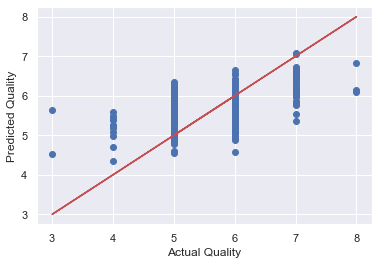

In [46]:
# visualise the error between actual and predicted value

plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')

In [47]:
# checking for another model:

from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(wine_features_tr, wine_labels)

DecisionTreeRegressor()

In [48]:
quality_prediction = tree_reg.predict(wine_features_tr)
mean_squared_error(wine_labels, quality_prediction)

#notice that error is zero: OVERFITTING

0.0

In [50]:
quality_test_prediction = tree_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_prediction)

0.653125

Text(0, 0.5, 'Predicted Quality')

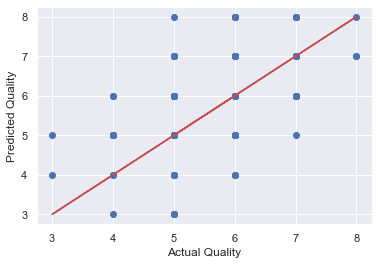

In [52]:
plt.scatter(wine_labels_test, quality_test_prediction)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')

In [54]:
# can use cross-validation for evaluating the performance of the model

from sklearn.model_selection import cross_val_score

# cross-validation provides seperate MSE for each validation set- which can be used to get mean estimation of MSE as well as SD- which helps us determine how precise the estimation is
# additional training runs = additional costs: TRADE OFF- can be expensive in certain cases

In [58]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard Deviation: ', scores.std())

In [59]:
# Linear Regression Cross Validation:

scores = cross_val_score(lin_reg, wine_features_tr, wine_labels, scoring = "neg_mean_squared_error", cv = 10)
lin_reg_mse_scores = -scores
display_scores(lin_reg_mse_scores)

Scores:  [0.56364537 0.4429824  0.38302744 0.40166681 0.29687635 0.37322622
 0.33184855 0.50182048 0.51661311 0.50468542]
Mean:  0.431639217212196
Standard Deviation:  0.08356359730413966


In [62]:
# Decision Tree Cross Validation

scores = cross_val_score(tree_reg, wine_features_tr, wine_labels, scoring = "neg_mean_squared_error", cv = 10)
tree_mse_scores = -scores
display_scores(tree_mse_scores)

Scores:  [0.5859375  0.6875     0.5703125  0.4765625  0.4375     0.6015625
 0.6015625  0.671875   0.8125     1.11023622]
Mean:  0.655554872047244
Standard Deviation:  0.18170941885504857


In [63]:
# Random forest Cross Validation

from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(wine_features_tr, wine_labels)

scores = cross_val_score(forest_reg, wine_features_tr, wine_labels, scoring = "neg_mean_squared_error", cv= 10)
forest_mse_scores = -scores
display_scores(forest_mse_scores)

Scores:  [0.37154766 0.42720078 0.30195859 0.32066406 0.22581719 0.29403125
 0.27039688 0.40046797 0.43287891 0.46221181]
Mean:  0.3507175092273622
Standard Deviation:  0.07515692700938022


In [64]:
# MSE on test set

quality_test_predictions = forest_reg.predict(wine_features_test_tr)
mean_squared_error(wine_labels_test, quality_test_predictions)

0.34769562499999995

Text(0, 0.5, 'Predicted Quality')

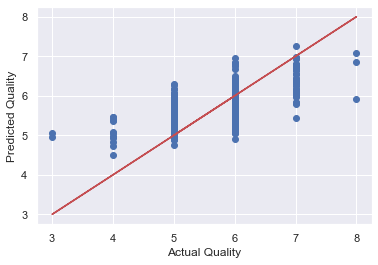

In [65]:
plt.scatter(wine_labels_test, quality_test_predictions)
plt.plot(wine_labels_test, wine_labels_test, 'r-')
plt.xlabel('Actual Quality')
plt.ylabel('Predicted Quality')

In [66]:
# can save this models using pickle model

# Finetuning ML Models

there are number of hyperparameters in the model which are set manually, Tuning these hyperparameters leads to better accuracy on ML models

# GridSearchCV

In [68]:
from sklearn.model_selection import GridSearchCV

# need to specify the list of hyperparameters with range of values to try

# for example in Randomforest we have hyperparameters like- number of estimators, maximum number of features etc..

param_grid = [{'n_estimators': [3,10,30], 'max_features':[2,4,6,8]},
             {'bootstrap':[False],'n_estimators':[3,10], 'max_features':[2,3,4]}]


# the first results into 3 x 4 = 12 combination
# the second results into 2 x 3 = 6 combinations
# total combinations = 12 + 6 = 18

In [69]:
# gridsearchcv object:

grid_search = GridSearchCV(forest_reg, param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
# CV= 5 i.e. 5 fold cross validation for training the model
# we need to train model for 18 parameter combinations and each combination would be trained 5 times
# 90 model training runs

grid_search.fit(wine_features_tr, wine_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [2, 4, 6, 8],
                          'n_estimators': [3, 10, 30]},
                         {'bootstrap': [False], 'max_features': [2, 3, 4],
                          'n_estimators': [3, 10]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [70]:
# best combinations of parameters
grid_search.best_params_

{'max_features': 4, 'n_estimators': 30}

In [71]:
# lets find out errors at different parameter setting:

cvres = grid_search.cv_results_
for mean_score, params in zip(cvres['mean_test_score'], cvres["params"]):
    print(-mean_score, params)

0.4844566993464053 {'max_features': 2, 'n_estimators': 3}
0.40088921568627456 {'max_features': 2, 'n_estimators': 10}
0.3621410266884531 {'max_features': 2, 'n_estimators': 30}
0.485979711328976 {'max_features': 4, 'n_estimators': 3}
0.3862460477941176 {'max_features': 4, 'n_estimators': 10}
0.36037448257080607 {'max_features': 4, 'n_estimators': 30}
0.4444424019607842 {'max_features': 6, 'n_estimators': 3}
0.3843799019607843 {'max_features': 6, 'n_estimators': 10}
0.3621825503812636 {'max_features': 6, 'n_estimators': 30}
0.486464801198257 {'max_features': 8, 'n_estimators': 3}
0.3946632352941176 {'max_features': 8, 'n_estimators': 10}
0.3646799836601307 {'max_features': 8, 'n_estimators': 30}
0.4845955882352941 {'bootstrap': False, 'max_features': 2, 'n_estimators': 3}
0.38134993872549017 {'bootstrap': False, 'max_features': 2, 'n_estimators': 10}
0.4673502178649237 {'bootstrap': False, 'max_features': 3, 'n_estimators': 3}
0.38477089460784314 {'bootstrap': False, 'max_features': 3, 

In [72]:
grid_search.best_estimator_

RandomForestRegressor(max_features=4, n_estimators=30)

In [73]:
#gridsearchCV is initialized with refit = True option- which retrains the best estimator on full training set. This is likely to lead us a better model as it is trained on larger dataset. 

# Randomized Search:

In [74]:
#when we have large hyperparameter space- its advisable to use randomized-searchcv. Selects random value for each hyperparameter at start of iteration and repeats the process for the given number of random combinations.

In [75]:
from sklearn.model_selection import RandomizedSearchCV

In [78]:
feature_importances = grid_search.best_estimator_.feature_importances_
sorted(zip(feature_importances, feature_list), reverse = True)

# based on this information we may drop the features that are of less importance

[(0.2053954081647006, 'alcohol'),
 (0.14837566372574956, 'sulphates'),
 (0.12112062378737581, 'volatile acidity'),
 (0.0857055808289872, 'total sulfur dioxide'),
 (0.08094557410687866, 'density'),
 (0.06449216024883625, 'fixed acidity'),
 (0.06401727699699787, 'citric acid'),
 (0.06204044469903123, 'chlorides'),
 (0.057930017859760374, 'residual sugar'),
 (0.05708284765649525, 'pH'),
 (0.052894401925187004, 'free sulfur dioxide')]

# Evaluation on Test Set

In [79]:
# Transform the test features:

# copy all the features except the output label
wine_feature_test = strat_test_set.drop("quality", axis = 1)

# copy the label list:
wine_labels_test = strat_test_set['quality'].copy()

# apply the transformations:
wine_features_test_tr = transform_pipeline.fit_transform(wine_features_test)

In [80]:
# use the predict method with the trained model and test set:

quality_test_prediction = grid_search.best_estimator_.predict(wine_features_test_tr)

In [81]:
# compare the predicted labels with the actual ones and report the evaluation metrics

mean_squared_error(wine_labels_test, quality_test_predictions)

0.34769562499999995

In [83]:
# its a good idea to get 95% confidence interval of the evaluation metrics.

from scipy import stats
confidence = 0.95
squared_errors = (quality_test_predictions - wine_labels_test) ** 2
stats.t.interval(confidence, 
                 len(squared_errors)-1, 
                 loc = squared_errors.mean(), 
                 scale = stats.sem(squared_errors))

(0.28632848904561764, 0.4090627609543827)

In [84]:
# Step 7: Present the Solution: tht highlights learning, system limitations and assumptions

In [86]:
# Launch Monitor and Maintain your system
'''
1. Launch:
    plug in input sources and write test cases
    
2. Monitoring
    System outages
    Degradation of model performance: Need to have strategy for this
    Either retrain the model if degradation
    fix threshold on matrix for this
    Trigger retraining if the threshold is breached
    Regular assessment of data quality

3. Maintenance:
    Train at regular interval
    Production roll out of the model
'''    

'\n1. Launch:\n    plug in input sources and write test cases\n    \n2. Monitoring\n    System outages\n    Degradation of model performance: Need to have strategy for this\n    Either retrain the model if degradation\n    fix threshold on matrix for this\n    Trigger retraining if the threshold is breached\n    Regular assessment of data quality\n\n3. Maintenance:\n    Train at regular interval\n    Production roll out of the model\n'